# Worksheet 16 

## To accompany Chapter 6.3 The Inverse Z-Transform

## Colophon

This worksheet can be downloaded as a [PDF file](https://cpjobling.github.io/eg-247-textbook/worksheets/worksheet16.pdf). We will step through this worksheet in class. 

An annotatable copy of the notes for this presentation will be distributed before the second class meeting as **Worksheet 9** in the **Week 4: Classroom Activities** section of the Canvas site. I will also distribute a copy to your personal **Worksheets** section of the **OneNote Class Notebook** so that you can add your own notes using OneNote. 

You are expected to have at least watched the video presentation of [Chapter 6.3](https://cpjobling.github.io/eg-247-textbook/dt_systems/3/i_z_transform) of the [notes](https://cpjobling.github.io/eg-247-textbook) before coming to class. If you haven't watch it afterwards!

After class, the lecture recording and the annotated version of the worksheets will be made available through Canvas.

## Agenda

* Inverse Z-Transform

* Examples using PFE

* Examples using Long Division

* Analysis in MATLAB

## The Inverse Z-Transform

The inverse Z-Transform enables us to extract a sequence $f[n]$ from $F(z)$. It can be found by any of the following methods:

* Partial fraction expansion
* The inversion integral
* Long division of polynomials

### Partial fraction expansion

We expand $F(z)$ into a summation of terms whose inverse is known. These terms have the form:

$$k,\;\frac{r_1 z}{z - p_1},\;\frac{r_1 z}{(z - p_1)^2},\;\frac{r_3 z}{z - p_2},\ldots$$

where $k$ is a constant, and $r_i$ and $p_i$ represent the residues and poles respectively, and can be real or complex<sup>1</sup>.

**Notes**

1. If complex, the poles and residues will be in complex conjugate pairs 

$$\frac{r_{i} z}{z - p_i} + \frac{r_{i}^* z}{z - p_i^*}$$

### Step 1: Make Fractions Proper

* Before we expand $F(z)$ into partial fraction expansions, we must first express it as a *proper* rational function.
* This is done by expanding $F(z)/z$ instead of $F(z)$
* That is we expand

$$\frac{F(z)}{z} = \frac{k}{z} + \frac{r_1}{z-p_1} + \frac{r_2}{z-p_2} + \cdots$$

### Step 2: Find residues

* Find residues from

$$r_k = \lim_{z\to p_k}(z - p_k)\frac{F(z)}{z} = (z - p_k)\left.\frac{F(z)}{z}\right|_{z=p_k}$$

### Step 3: Map back to transform tables form

* Rewrite $F(z)/z$:

$$z\frac{F(z)}{z} = F(z) = k + \frac{r_1z}{s-p_1} + \frac{r_2z}{s-p_2} + \cdots$$

### Example 1

Karris Example 9.4: use the partial fraction expansion to compute the inverse z-transform of

$$F(z) = \frac{1}{(1 - 0.5z^{-1})(1 - 0.75z^{-1})(1 - z^{-1})}$$


<pre style="border: 2px solid blue">



















</pre>

### MATLAB solution

See [example1.mlx](matlab/example1.mlx). (Also available as  [example1.m](matlab/example1.m).)

Uses MATLAB functions: 

* `collect` &ndash; expands a polynomial
* `sym2poly` &ndash; converts a polynomial into a numeric polymial (vector of coefficients in descending order of exponents)
* `residue` &ndash; calculates poles and zeros of a polynomial
* `ztrans` &ndash; symbolic z-transform
* `iztrans` &ndash; symbolic inverse ze-transform
* `stem` &ndash; plots sequence as a "lollipop" diagram

In [1]:
clear all
cd matlab
format compact

In [3]:
syms z n

The denoninator of $F(z)$

In [4]:
Dz = (z - 0.5)*(z - 0.75)*(z - 1);

Multiply the three factors of Dz to obtain a polynomial

In [5]:
Dz_poly = collect(Dz)

Dz_poly =
z^3 - (9*z^2)/4 + (13*z)/8 - 3/8


### Make into a rational polynomial

$z^2$

In [6]:
num = [0, 1, 0, 0];

$z^3 - 9/4 z^2 - 13/8 z - 3/8$ 

In [7]:
den = sym2poly(Dz_poly)

den =
    1.0000   -2.2500    1.6250   -0.3750


### Compute residues and poles

In [8]:
[r,p,k] = residue(num,den);

### Print results 

- `fprintf` works like the c-language function

In [9]:
fprintf('\n')
fprintf('r1 = %4.2f\t', r(1)); fprintf('p1 = %4.2f\n', p(1));...
fprintf('r2 = %4.2f\t', r(2)); fprintf('p2 = %4.2f\n', p(2));...
fprintf('r3 = %4.2f\t', r(3)); fprintf('p3 = %4.2f\n', p(3));


r1 = 8.00	p1 = 1.00
r2 = -9.00	p2 = 0.75
r3 = 2.00	p3 = 0.50


### Symbolic proof

$$f[n] = 2\left(\frac{1}{2}\right)^n - 9\left(\frac{3}{4}\right)^n + 8$$


In [10]:
% z-transform
fn = 2*(1/2)^n-9*(3/4)^n + 8;
Fz = ztrans(fn)

Fz =
(8*z)/(z - 1) + (2*z)/(z - 1/2) - (9*z)/(z - 3/4)


In [11]:
% inverse z-transform
iztrans(Fz)

ans =
2*(1/2)^n - 9*(3/4)^n + 8


### Sequence

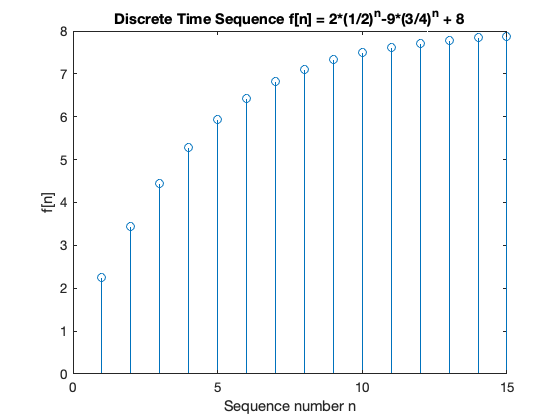

In [12]:
n = 1:15;
sequence = subs(fn,n);
stem(n,sequence)
title('Discrete Time Sequence f[n] = 2*(1/2)^n-9*(3/4)^n + 8');
ylabel('f[n]')
xlabel('Sequence number n')

### Example 2

Karris example 9.5: use the partial fraction expansion method to to compute the inverse z-transform of

$$F(z) = \frac{12z}{(z+1)(z - 1)^2}$$


<pre style="border: 2px solid blue">



















</pre>

### MATLAB solution

See [example2.mlx](matlab/example2.mlx). (Also available as  [example2.m](matlab/example2.m).)

Uses additional MATLAB functions: 

* `dimpulse` &ndash; computes and plots a sequence $f[n]$ for any range of values of $n$

In [ ]:
open example2

### Example 3

Karris example 9.6: use the partial fraction expansion method to to compute the inverse z-transform of

$$F(z) = \frac{z + 1}{(z-1)(z^2 + 2z + 2)}$$

<pre style="border: 2px solid blue">



















</pre>

### MATLAB solution

See [example3.mlx](matlab/example3.mlx). (Also available as [example3.m](matlab/example3.m).)

In [ ]:
open example3

### Inverse Z-Transform by the Inversion Integral

The inversion integral states that:

$$f[n] = \frac{1}{j2\pi}\oint_C {F(z){z^{n - 1}}\,dz} $$

where $C$ is a closed curve that encloses all poles of the integrant.

This can (*apparently*) be solved by Cauchy's residue theorem!!

Fortunately (:-), this is beyond the scope of this module!

See Karris Section 9.6.2 (pp 9-29&mdash;9-33) if you want to find out more.

### Inverse Z-Transform by the Long Division

To apply this method, $F(z)$ must be a rational polynomial function, and the numerator and denominator must be polynomials arranged in descending powers of $z$.

We will work through an example in class.

[Skip next slide in Pre-Lecture]

### Example 4

Karris example 9.9: use the long division method to determine $f[n]$ for $n = 0,\,1,\,\mathrm{and}\,2$, given that

$$F(z) = \frac{1 + z^{-1} + 2z^{-2} + 3z^{-3}}{(1 - 0.25z^{-1})(1 - 0.5z^{-1})(1 - 0.75z^{-1})}$$

<pre style="border: 2px solid blue">



















</pre>

### MATLAB

See [example4.mlx](matlab/example4.mlx). (also available as [example4.m](matlab/example4.m).)

In [ ]:
open example4

## Methods of Evaluation of the Inverse Z-Transform

### Partial Fraction Expansion

*Advantages*

* Most familiar.
* Can use MATLAB `residue` function.

*Disadvantages*

* Requires that $F(z)$ is a proper rational function.

### Invsersion Integral

*Advantage*

* Can be used whether $F(z)$ is rational or not

*Disadvantages*

* Requires familiarity with the *Residues theorem* of complex variable analaysis.</li></ul>

### Long Division

*Advantages*

* Practical when only a small sequence of numbers is desired.
* Useful when z-transform has no closed-form solution.

*Disadvantages*

* Can use MATLAB `dimpulse` function to compute a large sequence of numbers.
* Requires that $F(z)$ is a proper rational function.
* Division may be endless.

## Summary

* Inverse Z-Transform
* Examples using PFE
* Examples using Long Division
* Analysis in MATLAB

*Coming Next*

* DT transfer functions, continuous system equivalents, and modelling DT systems in Matlab and Simulink.